<a href="https://colab.research.google.com/github/mandliya/ml/blob/master/time_series/Time_series_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Working with time series in python

Most of the text/code/concepts are borrowed from : [PythonDataScienceHandBook](https://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb)

One of the most common type of data we have to work with as a data scientist/machine learning engineer is with time data. Date and Time data can be of multiple flavors:

- *Time Stamps* : This refers to a moment in time say: June 18, 2019,  5:00 PM.
- *Time Intervals*: Length of time between a start time and an end time. Example: Month of October, 2018. The *period* on other hand is special case of time intervals in which each interval is of fixed length and does not overlap. Example: 24 hour long period comprising days.
- *Time Delta or Duration*:  This refers to an exact length of time elapsed (eg: 20.12 seconds)

### Date and Time in Python

Pandas comes with a great set of utilities to deal with date and time, however let us first revisit the concepts of date and time in Python modules (native and other)

#### Native Python date and time: `datetime` and  `dateutil`

##### Build a date using datetime

In [1]:
from datetime import datetime
datetime(year=2019, month=6, day=18)

datetime.datetime(2019, 6, 18, 0, 0)

Using `dateutil` we can parse dates from a lot of string formats, for example:

In [2]:
from dateutil import parser
date = parser.parse("18th of June, 2019")
date

datetime.datetime(2019, 6, 18, 0, 0)

`datetime` has lot of utilities to get more information about the date. For example getting day of the week:

In [3]:
date.strftime("%A")

'Tuesday'

To get the current date + time.

In [4]:
now = datetime.now()
now

datetime.datetime(2019, 6, 13, 20, 15, 1, 253899)

To get today's date

In [5]:
date.today()


datetime.datetime(2019, 6, 13, 20, 15, 1, 265571)

You can do tonne of other things. Refer to documents when you are trying to do something, and pretty sure these modules would have that.
`datetime` [documentation](https://docs.python.org/3/library/datetime.html) and `dateutil` [documentation](https://dateutil.readthedocs.io/en/stable/) are pretty solid.

Let's explore `NumPy` date and time functionality: `datetime64`. Unlike `python` native modules, `numpy` encodes date and time as 64 bit integer allowing to store compactly. 


#### NumPy's handling of Date and Time

In [6]:
import numpy as np
date = np.array('2019-06-18', dtype='datetime64[D]')
date

array('2019-06-18', dtype='datetime64[D]')

Once we have date formatted, we can do vectorized operations on it.

In [7]:
date + np.arange(10)

array(['2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21',
       '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25',
       '2019-06-26', '2019-06-27'], dtype='datetime64[D]')

This `numpy`'s functionality provides very fast operations on date and time as compared to native `datetime`. This helps immensely when we are dealing with large amount of data. One detail of the `datetime64` and `timedelta64` objects is that they are built on a fundamental time unit. Because the datetime64 object is limited to 64-bit precision, the range of encodable times is 2^64 times this fundamental unit. In other words, datetime64 imposes a trade-off between time resolution and maximum time span.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of 264 nanoseconds, or just under 600 years. NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [8]:
np.datetime64('2019-06-12')

numpy.datetime64('2019-06-12')

Minute based  datetime

In [9]:
np.datetime64('2019-06-15 10:00')

numpy.datetime64('2019-06-15T10:00')

Timezone is automatically set to current computer's timezone. You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [10]:
np.datetime64('2019-06-15 11:59:23.50', 'ns')

numpy.datetime64('2019-06-15T11:59:23.500000000')

There is lot more to explore in NumPy's `datetime64` Here is the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html). There are obviously some advantages (eg. storage) of using this over python's native `datetime` and `dateutil` and obviously some disadvantages (e.g. extensive parsing support etc)


### Date and Time in Pandas: Best of both world

Pandas `Timestamp` implementation provides best of both worlds. Easy flexible easy-to-use functionality of  `datetime` and `dateutil` and vectorized storage and interface of `numpy.datetime64`. From a group of `Timestamp` objects, Pandas can construct a `DatetimeIndex` which can be used to easily index data in `Series` or `DataFrame`.  

#### Easy parsing of date and time


In [11]:
import pandas as pd
date = pd.to_datetime("19th June, 2019")
date

Timestamp('2019-06-19 00:00:00')

Same as `dateutil` we can get day of the week

In [12]:
date.strftime("%A")

'Wednesday'

#### NumPy style vectorized operations! 

In [13]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
               '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing data by Time

We can construct a `Series` and `DataFrame` object that has time indexed data

In [14]:
index = pd.DatetimeIndex(['2014-06-19', '2015-06-19', '2016-06-19', '2017-06-19',
                         '2014-05-19', '2015-05-19', '2016-05-19', '2017-05-19'])

data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7], index=index)
data

2014-06-19    0
2015-06-19    1
2016-06-19    2
2017-06-19    3
2014-05-19    4
2015-05-19    5
2016-05-19    6
2017-05-19    7
dtype: int64

In [15]:
data['2014-05-19' : '2016-06-19']

2014-06-19    0
2015-06-19    1
2016-06-19    2
2014-05-19    4
2015-05-19    5
2016-05-19    6
dtype: int64

In [16]:
data['2015']

2015-06-19    1
2015-05-19    5
dtype: int64

#### Pandas Time Series Data Structures

- For  *time stamps*, Pandas provides the `Timestamp` type. As mentioned before, it is essentially a replacement for Python's native `datetime`, but is based on the more efficient `numpy.datetime64` data type. The associated Index structure is `DatetimeIndex`.  Pandas has `to_datetime()` which yeilds a `Timestamp` when passed a single date, and yields a `DatetimeIndex` when passed a series of dates. 

In [17]:
dates = pd.to_datetime([datetime(2019, 6, 19), '20th of June, 2019', '2019-06-21',
                       '22-06-2019', '23-Jun-2019', '20190624'])
dates

DatetimeIndex(['2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
               '2019-06-23', '2019-06-24'],
              dtype='datetime64[ns]', freq=None)

- For *time Periods*, Pandas provides the Period type. This encodes a fixed-frequency interval based on `numpy.datetime64`. The associated index structure is `PeriodIndex`. Any `DatetimeIndex` can be converted to a `PeriodIndex` with the `to_period()` function with addition of a frequency code. Here we will use `'D'` to indicate daily frequency


In [18]:
dates.to_period('D')

PeriodIndex(['2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
             '2019-06-23', '2019-06-24'],
            dtype='period[D]', freq='D')

- For *time deltas or durations*, Pandas provides the `Timedelta` type. Timedelta is a more efficient replacement for Python's native `datetime.timedelta` type, and is based on `numpy.timedelta64`. The associated index structure is `TimedeltaIndex`. A `TimedeltaIndex` is created for example, when a date is substracted from another.

In [19]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Creation of date range in Pandas.

Akin to python's `range()` and NumPy's  `np.arange()` Pandas provide `pd.date_range()`, `pd.period_range()` and `pd.timedelta_range()` which take a start, end and a step size to create a sequence.  

In [20]:
pd.date_range('2019-06-10', '2019-06-15')

DatetimeIndex(['2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13',
               '2019-06-14', '2019-06-15'],
              dtype='datetime64[ns]', freq='D')

The date range can be specified  with a startpoint and a number of periods, the frequency defaults to `D`



In [21]:
pd.date_range('2019-06-10', periods=5)

DatetimeIndex(['2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13',
               '2019-06-14'],
              dtype='datetime64[ns]', freq='D')

Frquency can be changed by `freq` parameter, changing `freq` to `'H'`

In [22]:
pd.date_range('2019-06-12', periods=8, freq='H')

DatetimeIndex(['2019-06-12 00:00:00', '2019-06-12 01:00:00',
               '2019-06-12 02:00:00', '2019-06-12 03:00:00',
               '2019-06-12 04:00:00', '2019-06-12 05:00:00',
               '2019-06-12 06:00:00', '2019-06-12 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Similarly, we can create sequences of `period` or `Timedelta`. 

In [23]:
pd.period_range('2019-06', periods=5, freq='M')

PeriodIndex(['2019-06', '2019-07', '2019-08', '2019-09', '2019-10'], dtype='period[M]', freq='M')

In [24]:
pd.timedelta_range(0, periods=5, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00'], dtype='timedelta64[ns]', freq='H')

Following are the frequency parameters with pandas loaded functions.

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |


The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning:


| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

In [25]:
pd.timedelta_range(0, periods=9, freq="1H30T")

TimedeltaIndex(['00:00:00', '01:30:00', '03:00:00', '04:30:00', '06:00:00',
                '07:30:00', '09:00:00', '10:30:00', '12:00:00'],
               dtype='timedelta64[ns]', freq='90T')

Creating a business day offset

In [26]:
from pandas.tseries.offsets import BDay
pd.date_range('2019-06-15', periods=5, freq=BDay())

DatetimeIndex(['2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20',
               '2019-06-21'],
              dtype='datetime64[ns]', freq='B')

### Resampling, shifting and windowing

We will now see some resampling, shifting and windowing mechanism in Pandas. Let us first install `pandas-datareader` to import some financial data

In [27]:
!pip install pandas-datareader

In [0]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 6, 19)
df_goog = web.DataReader('GOOGL', 'iex', start, end)

In [29]:
df_goog.head()

,open,high,low,close,volume
date,,,,,
2014-06-13,560.08,560.65,553.7200,560.350,1353343
2014-06-16,557.25,557.99,550.0000,552.300,1971842
2014-06-17,552.36,553.74,547.4700,550.615,1481669
2014-06-18,552.80,561.40,551.5800,560.660,2060681
2014-06-19,561.15,565.00,556.6679,564.990,2630539


In [30]:
df_goog.index

Index(['2014-06-13', '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
       '2014-06-20', '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26',
       ...
       '2019-05-30', '2019-05-31', '2019-06-03', '2019-06-04', '2019-06-05',
       '2019-06-06', '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12'],
      dtype='object', name='date', length=1258)

In [0]:
df_goog.index = pd.to_datetime(df_goog.index)

In [32]:
df_goog.index

DatetimeIndex(['2014-06-13', '2014-06-16', '2014-06-17', '2014-06-18',
               '2014-06-19', '2014-06-20', '2014-06-23', '2014-06-24',
               '2014-06-25', '2014-06-26',
               ...
               '2019-05-30', '2019-05-31', '2019-06-03', '2019-06-04',
               '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-10',
               '2019-06-11', '2019-06-12'],
              dtype='datetime64[ns]', name='date', length=1258, freq=None)

In [0]:
google_close = df_goog['close']

In [34]:
google_close.head()

date
2014-06-13    560.350
2014-06-16    552.300
2014-06-17    550.615
2014-06-18    560.660
2014-06-19    564.990
Name: close, dtype: float64

In [35]:
google_close.index

DatetimeIndex(['2014-06-13', '2014-06-16', '2014-06-17', '2014-06-18',
               '2014-06-19', '2014-06-20', '2014-06-23', '2014-06-24',
               '2014-06-25', '2014-06-26',
               ...
               '2019-05-30', '2019-05-31', '2019-06-03', '2019-06-04',
               '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-10',
               '2019-06-11', '2019-06-12'],
              dtype='datetime64[ns]', name='date', length=1258, freq=None)

#### Let's visualize Google stocks closing price over time. 

We can use simple matlotlib + pandas to do it

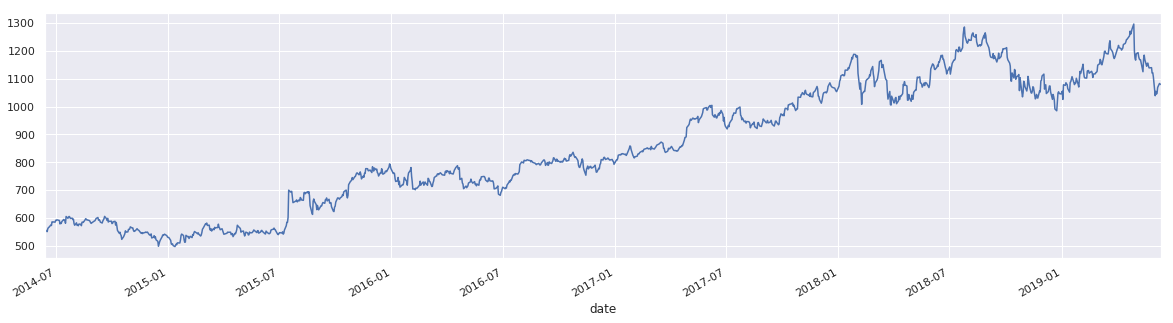

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
google_close.plot(figsize=(20, 5))

#### Resampling and converting frequencies

Pandas provides elegant ways to resample data at a higher or lower frequency. This can be done using `resample()` method or `asfreq()` method. `resample()` is **data aggregation** while `asfreq()` is **data selection**. 

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of business year (BA). Note the table above for frequency parameters 

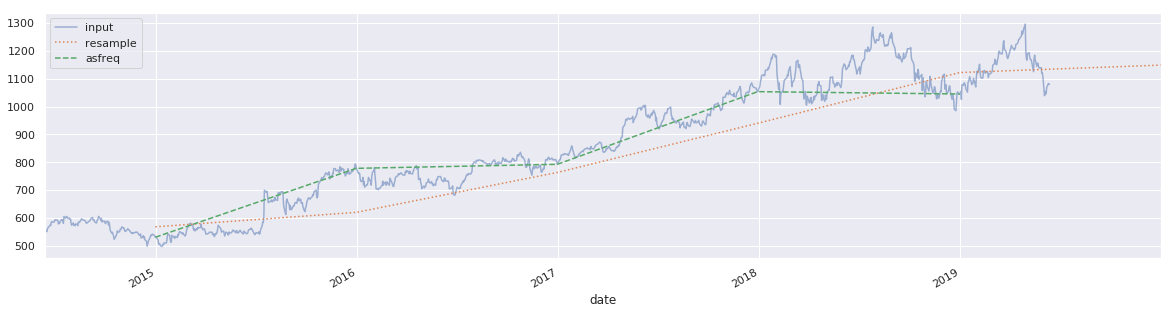

In [37]:
google_close.plot(figsize=(20, 5), alpha=0.5, style='-')
google_close.resample('BA').mean().plot(style=":")
google_close.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Notice the difference: at each point, `resample` reports the average of the previous year, while `asfreq` reports the value at the end of the year.

For up-sampling, `resample()` and `asfreq()` are largely equivalent, though resample has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the `pd.fillna()` function discussed previously, `asfreq()` accepts a method argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends):



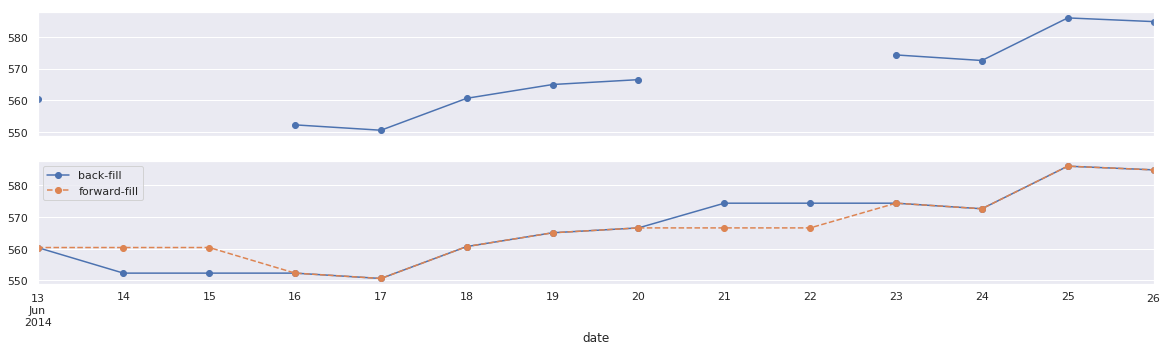

In [38]:
fig, ax = plt.subplots(2, sharex=True, figsize=(20, 5))
data = google_close.iloc[:10]

data.asfreq('D').plot(ax = ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: non-business days are left as `NA` values and do not appear on the plot. The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

### Time-shifts

Another common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: `shift()` and `tshift()`. In short, the difference between them is that `shift()` shifts the data, while `tshift()` shifts the index. In both cases, the shift is specified in multiples of the frequency.

Here we will both `shift()` and `tshift()` by 900 days;

In [39]:
mini = google_close['2014':'2014']
mini.idxmax()

Timestamp('2014-09-19 00:00:00')

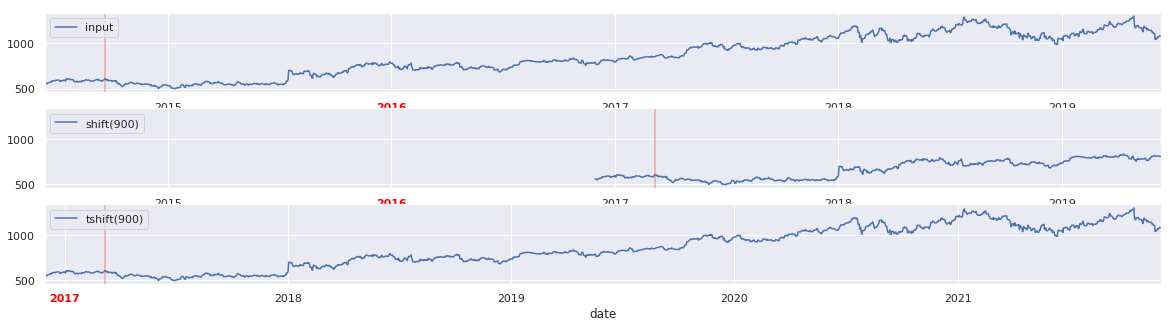

In [40]:
fig, ax = plt.subplots(3, sharey=True, figsize=(20, 5))
google_close = google_close.asfreq('D', method='pad')

google_close.plot(ax=ax[0])
google_close.shift(900).plot(ax=ax[1])
google_close.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2014-09-19')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

#### Computing difference over time

One of the common application of `shift` is to compute difference over time. Let us calculate return of investment of Google stock over the course of dataset.

Text(0, 0.5, '% Return on investment')

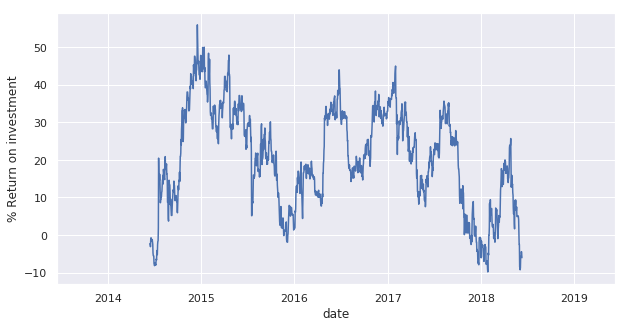

In [41]:
ROI = 100 * (google_close.tshift(-365)/google_close - 1)
ROI.plot(figsize=(10, 5))
plt.ylabel('% Return on investment')

## Visualizing Seattle Bicycle Counts

Let's play with some more data. We will use [Seattle's Fremont Bridge bicycle data](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k) to visualize time series.

In [42]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1637k    0 1637k    0     0   970k      0 --:--:--  0:00:01 --:--:--  970k


In [43]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-05-31 23:00:00,22.0,35.0
2019-05-31 22:00:00,29.0,52.0
2019-05-31 21:00:00,46.0,57.0
2019-05-31 20:00:00,48.0,92.0
2019-05-31 19:00:00,97.0,151.0


Let's clean the data by first giving better column names.

In [44]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')
data.head()

,West,East,Total
Date,,,
2019-05-31 23:00:00,22.0,35.0,57.0
2019-05-31 22:00:00,29.0,52.0,81.0
2019-05-31 21:00:00,46.0,57.0,103.0
2019-05-31 20:00:00,48.0,92.0,140.0
2019-05-31 19:00:00,97.0,151.0,248.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58368 entries, 2019-05-31 23:00:00 to 2012-10-03 00:00:00
Data columns (total 3 columns):
West     58359 non-null float64
East     58359 non-null float64
Total    58359 non-null float64
dtypes: float64(3)
memory usage: 1.8 MB


We have few `null` values, lets drop them.

In [46]:
data.dropna().describe()

,West,East,Total
count,58359.000000,58359.000000,58359.000000
mean,52.138179,58.945304,111.083483
std,67.516088,85.887864,140.850604
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,60.000000
75%,70.000000,71.000000,144.000000
max,698.000000,745.000000,1004.000000


Let's visualize the raw data

In [0]:
%matplotlib inline
import seaborn; seaborn.set()

Text(0, 0.5, 'Hourly Bicycle Count')

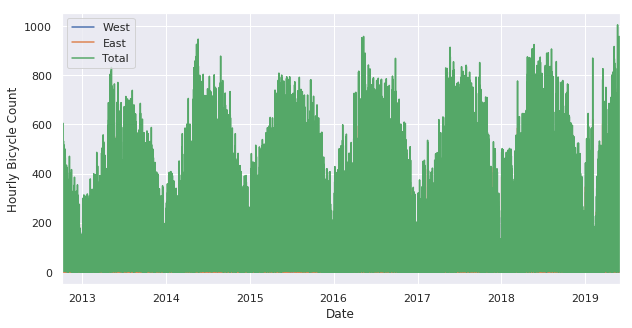

In [50]:
data.plot(figsize=(10, 5))
plt.ylabel('Hourly Bicycle Count')

The data is too dense to make any sense. Let's resample data by week.

Text(0, 0.5, 'Weekly Bicycle Count')

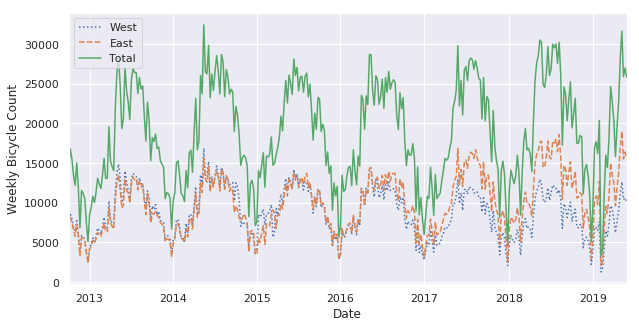

In [51]:
weekly = data.resample('W').sum()
weekly.plot(figsize=(10, 5), style=[':', '--', '-'])
plt.ylabel('Weekly Bicycle Count')

Clearly we see a trend now after resampling. People tend to bike more in summer than in winter is clearly a pattern here. 

Let's try *rolling mean* utilizing `pd.rolling_mean()` function. Let's do a 30 day rolling mean of our data.. Making sure to center the window.


Text(0, 0.5, 'mean hourly count')

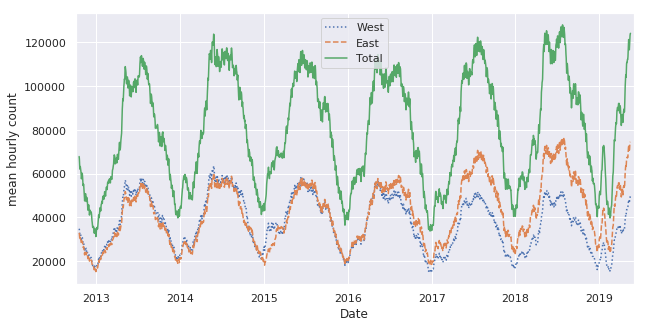

In [53]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(figsize=(10, 5), style=[':', '--', '-'])
plt.ylabel('mean hourly count')

The graph is too jagged due to hard cut-off window. Let's try a smoother version.

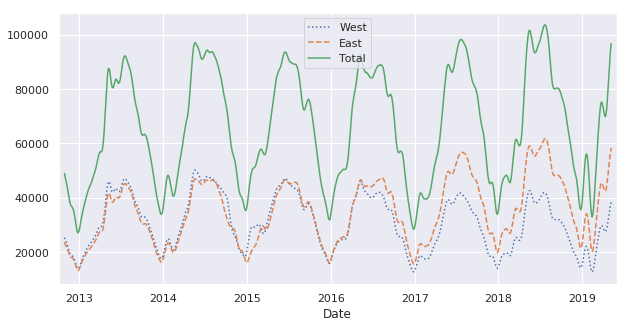

In [56]:
daily.rolling(50, center=True, win_type='gaussian').sum(
    std=10).plot(figsize=(10, 5), style=[':', '--', '-'])

While the resampling gives us trends to look at, it does hide internal structure in the data. Let's do aggregation and grouping. We might want to look at average traffic as a function of the day.

In [58]:
data.index.time

array([datetime.time(23, 0), datetime.time(22, 0), datetime.time(21, 0),
       ..., datetime.time(2, 0), datetime.time(1, 0), datetime.time(0, 0)],
      dtype=object)

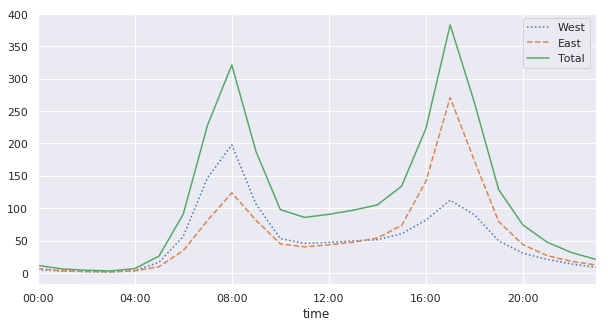

In [57]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize=(10, 5))

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

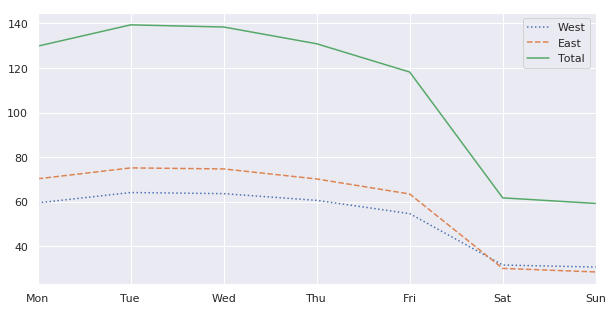

In [59]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_weekday.plot(figsize=(10, 5), style=[':', '--', '-'])

This trend makes sense too. Monday to Friday has way more riders than Saturday and Sunday. Also notice that 'Tuesday' is the peak day.

Let's figure out hourly trend on weekday vs Weekend. We will draw multiple plots (subplots) in one plot

In [0]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

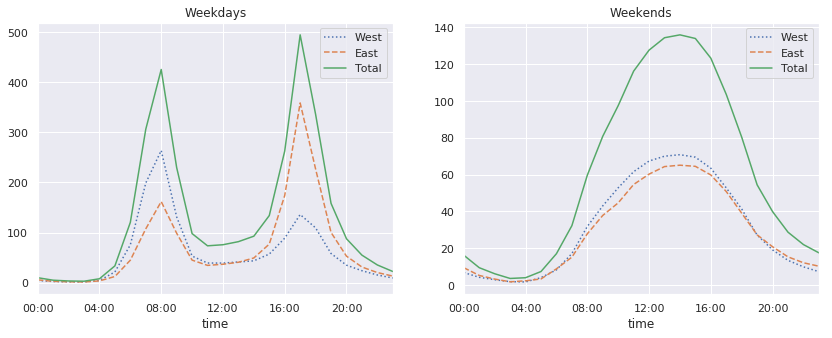

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks,
                          style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks,
                          style=[':', '--', '-'])

A clear bimodal vs unimodel trend for weekend vs weekday. People tend to bike in mid-day on weekend for mostly fun, whereas the two peaks around 8 am and 5 pm on weekday represents biking for work.